<a href="https://colab.research.google.com/github/livjab/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module3-dimensionality-reduction/High%20Dimensional%20Data%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

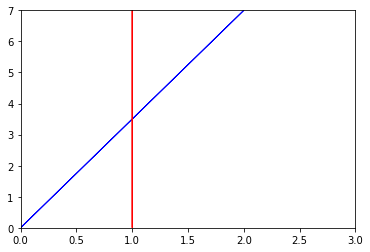

In [3]:
plt.xlim(0,3)
plt.ylim(0,7)

function = [2, 7]

line_test = [0, 7]

plt.arrow(0, 0, function[0], function[1], color="blue");
plt.arrow(1, 0, line_test[0], line_test[1], color="red");

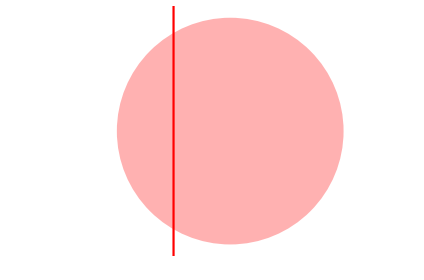

In [4]:
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection


fig, ax = plt.subplots()

grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T

patches = []

# add a circle
circle = mpatches.Circle(grid[0], 0.1, ec="none")
patches.append(circle)

colors = np.linspace(0, 1, len(patches))
collection = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.3)
collection.set_array(np.array(colors))
ax.add_collection(collection)
#ax.add_line(line)

plt.arrow(.15, 0, 0, 1, color="red");

plt.axis('equal')
plt.axis('off')
plt.tight_layout()

plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Because there is more than one output for a specific input.


# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

1 and 2 are functions because they take an input and provide only one output that is specific to that input

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

R3 --> R3

R4 --> R2


## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Yes

m(x1, x2, x3) = (x1 + x2, x1 + x3, x2 + x3, x1 * x3)

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

\begin{align}
T = \begin{bmatrix} 1 & 3 \\ -1 & 2 \end{bmatrix}
\end{align}
\

\begin{align}
T = \begin{bmatrix} 4 & 1 & 2 \\-1 & 2 & 3 \\ 5 & 1 & -2  \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [0]:
# x1 = 2
# x2 = 5
# p = [2, 5]

2 + 3*5 = 17

5*2 - 2 = 8


\begin{align}
\begin{bmatrix} 1 & 3 \\ -1 & 2 \end{bmatrix}\begin{bmatrix} 2 \\ 5 \end{bmatrix} = \begin{bmatrix} 17 \\ 8 \end{bmatrix}
\end{align}

In [0]:
# x1 = 3
# x2 = 4
# x3 = 2
# q = [3, 4, 2]

4x3 + 4 + 2x2 = 20

2x4 - 3 + 3x2 = 11

5x3 - 2x2 + 4 = 15

\begin{align}
\begin{bmatrix} 4 & 1 & 2 \\-1 & 2 & 3 \\ 5 & 1 & -2  \end{bmatrix}
\begin{bmatrix} 3 \\ 4 \\ 2 \end{bmatrix} = \begin{bmatrix} 20 \\ 11\\ 15\end{bmatrix}
\end{align}

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

An eigenvector is a vector that does not change during a transformation. It may be scaled, but will still lay on the same line after transformation. The eigenvalue is how the eigenvector is scaled.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

Limitations of the human brain, along with limitations in visualizing more than about 5 dimensions at one time.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

You should have 5 times the number of observations as you do parameters.

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [7]:
df = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = ['species']

X = df.loc[:, features].values
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [30]:
# calculate the mean of each column
means = mean(X.T, axis=1)
print(means)

[5.84333333 3.054      3.75866667 1.19866667]


In [31]:
# center columns by subtracting column means
centered_data = X - means
print(centered_data)

[[-7.43333333e-01  4.46000000e-01 -2.35866667e+00 -9.98666667e-01]
 [-9.43333333e-01 -5.40000000e-02 -2.35866667e+00 -9.98666667e-01]
 [-1.14333333e+00  1.46000000e-01 -2.45866667e+00 -9.98666667e-01]
 [-1.24333333e+00  4.60000000e-02 -2.25866667e+00 -9.98666667e-01]
 [-8.43333333e-01  5.46000000e-01 -2.35866667e+00 -9.98666667e-01]
 [-4.43333333e-01  8.46000000e-01 -2.05866667e+00 -7.98666667e-01]
 [-1.24333333e+00  3.46000000e-01 -2.35866667e+00 -8.98666667e-01]
 [-8.43333333e-01  3.46000000e-01 -2.25866667e+00 -9.98666667e-01]
 [-1.44333333e+00 -1.54000000e-01 -2.35866667e+00 -9.98666667e-01]
 [-9.43333333e-01  4.60000000e-02 -2.25866667e+00 -1.09866667e+00]
 [-4.43333333e-01  6.46000000e-01 -2.25866667e+00 -9.98666667e-01]
 [-1.04333333e+00  3.46000000e-01 -2.15866667e+00 -9.98666667e-01]
 [-1.04333333e+00 -5.40000000e-02 -2.35866667e+00 -1.09866667e+00]
 [-1.54333333e+00 -5.40000000e-02 -2.65866667e+00 -1.09866667e+00]
 [-4.33333333e-02  9.46000000e-01 -2.55866667e+00 -9.98666667e

In [32]:
# calculate covariance matrix of centered matrix

covariance_matrix = cov(centered_data.T)
print(covariance_matrix)

[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


In [12]:
# eigen of covariance matrix
values, vectors = eig(covariance_matrix)
print("\n Eigenvectors: \n", vectors)
print("\n Eigenvalues: \n", values)


 Eigenvectors: 
 [[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]

 Eigenvalues: 
 [4.22484077 0.24224357 0.07852391 0.02368303]


In [13]:
# project data
P = vectors.T.dot(centered_data.T)
print("\n Projected Data: \n", P.T)


 Projected Data: 
 [[-2.68420713e+00 -3.26607315e-01 -2.15118370e-02  1.00615724e-03]
 [-2.71539062e+00  1.69556848e-01 -2.03521425e-01  9.96024240e-02]
 [-2.88981954e+00  1.37345610e-01  2.47092410e-02  1.93045428e-02]
 [-2.74643720e+00  3.11124316e-01  3.76719753e-02 -7.59552741e-02]
 [-2.72859298e+00 -3.33924564e-01  9.62296998e-02 -6.31287327e-02]
 [-2.27989736e+00 -7.47782713e-01  1.74325619e-01 -2.71468037e-02]
 [-2.82089068e+00  8.21045110e-02  2.64251085e-01 -5.00996251e-02]
 [-2.62648199e+00 -1.70405349e-01 -1.58015103e-02 -4.62817610e-02]
 [-2.88795857e+00  5.70798026e-01  2.73354061e-02 -2.66154143e-02]
 [-2.67384469e+00  1.06691704e-01 -1.91533300e-01 -5.58909660e-02]
 [-2.50652679e+00 -6.51935014e-01 -6.92749958e-02 -1.66082478e-02]
 [-2.61314272e+00 -2.15206320e-02  1.07650353e-01 -1.57704569e-01]
 [-2.78743398e+00  2.27740189e-01 -2.00327788e-01 -7.23508674e-03]
 [-3.22520045e+00  5.03279909e-01  6.84136292e-02 -2.19466641e-02]
 [-2.64354322e+00 -1.18619490e+00 -1.44505

Still seems like I have too many dimensions. Going to run through scikitlearn to see what I come up with.

After more research, I think that I had done thie correctly, and that the first two columns are my first 2 pricipal compenets. I will graph the first two and see if it matches with my results below.

In [35]:
df = pd.DataFrame({"Principal Component 1": B[:,0], 
                   "Principal Component 2": B[:,1]})
df.shape

(150, 2)

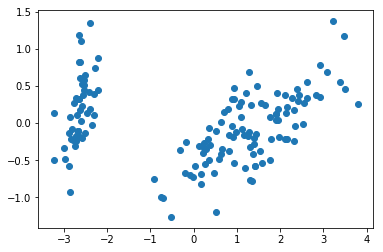

In [37]:
plt.scatter(df["Principal Component 1"], df["Principal Component 2"]);

This graph looks very siilar to the one below, so it seems that doing PCA by hand still creates the same number of dimensions, but I can choose to keep however many I want to use.


In [14]:
# Principal Component Analysis
from numpy import array
from sklearn.decomposition import PCA

# define a matrix
X = df.loc[:, features].values
print("Data: \n", X)

# create the PCA instance
pca = PCA(2)

# fit on data
pca.fit(X)

# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

# transform data
B = pca.transform(X)
print("\n Projected Data: \n", B)

Data: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.

In [26]:
B.shape

(150, 2)

In [27]:
PCA = pd.DataFrame({"Principal Component 1": B[:,0], 
                    "Principal Component 2": B[:,1]})
PCA

,Principal Component 1,Principal Component 2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925
5,-2.279897,0.747783
6,-2.820891,-0.082105
7,-2.626482,0.170405
8,-2.887959,-0.570798
9,-2.673845,-0.106692


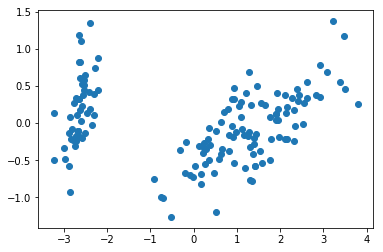

In [28]:
plt.scatter(PCA["Principal Component 1"], PCA["Principal Component 2"]);

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)